In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.signal.windows import gaussian

In [ ]:
data_dir = 'D:/Data Science/UROP/WendiX4Testing/data/'

In [ ]:
B500HZ = np.load(f'{data_dir}0605_breathing_500HZ.npy')
o_moves = np.load(f'{data_dir}0605_other_moves.npy')
breathing = np.load(f'{data_dir}0610_breathing.npy')
walking = np.load(f'{data_dir}0610_walking.npy')
np_walking = np.load(f'{data_dir}0613_nonpure_walking.npy')
std_breathing = np.load(f'{data_dir}0613_standing_breathing.npy')
walk_and_breathe = np.load(f'{data_dir}0613_walking_and_breathing.npy')

complex_data = [np.real(B500HZ), np.imag(B500HZ),
                np.real(o_moves), np.imag(o_moves),
                np.real(breathing), np.imag(breathing),
                np.real(np_walking), np.imag(np_walking),
                np.real(std_breathing), np.imag(std_breathing),
                np.real(walk_and_breathe), np.imag(walk_and_breathe)
                ]

In [57]:
"""(0, 2, 4, 6, 8, 10) for real (500 Hz breathing, other moves, breathing, non-pure walking, standard breathing, walking and breathing)
(1, 3, 5, 7, 9) for imaginary components"""
dataset_id = 10

In [ ]:
# 4th-order Butterworth high-pass filter
bin_number_hpf = 30
hpf = signal.butter(4,  5, btype='highpass', output='sos', fs=500)
sig = complex_data[dataset_id][:, bin_number_hpf]

B_hpf = signal.sosfilt(hpf, sig)
x111 = np.linspace(0, np.size(B_hpf, 0), np.size(B_hpf, 0))

plt.plot(x111[10:, ], B_hpf[10:], linewidth=0.15)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f"High-pass filter: bin {bin_number_hpf}")
plt.show()

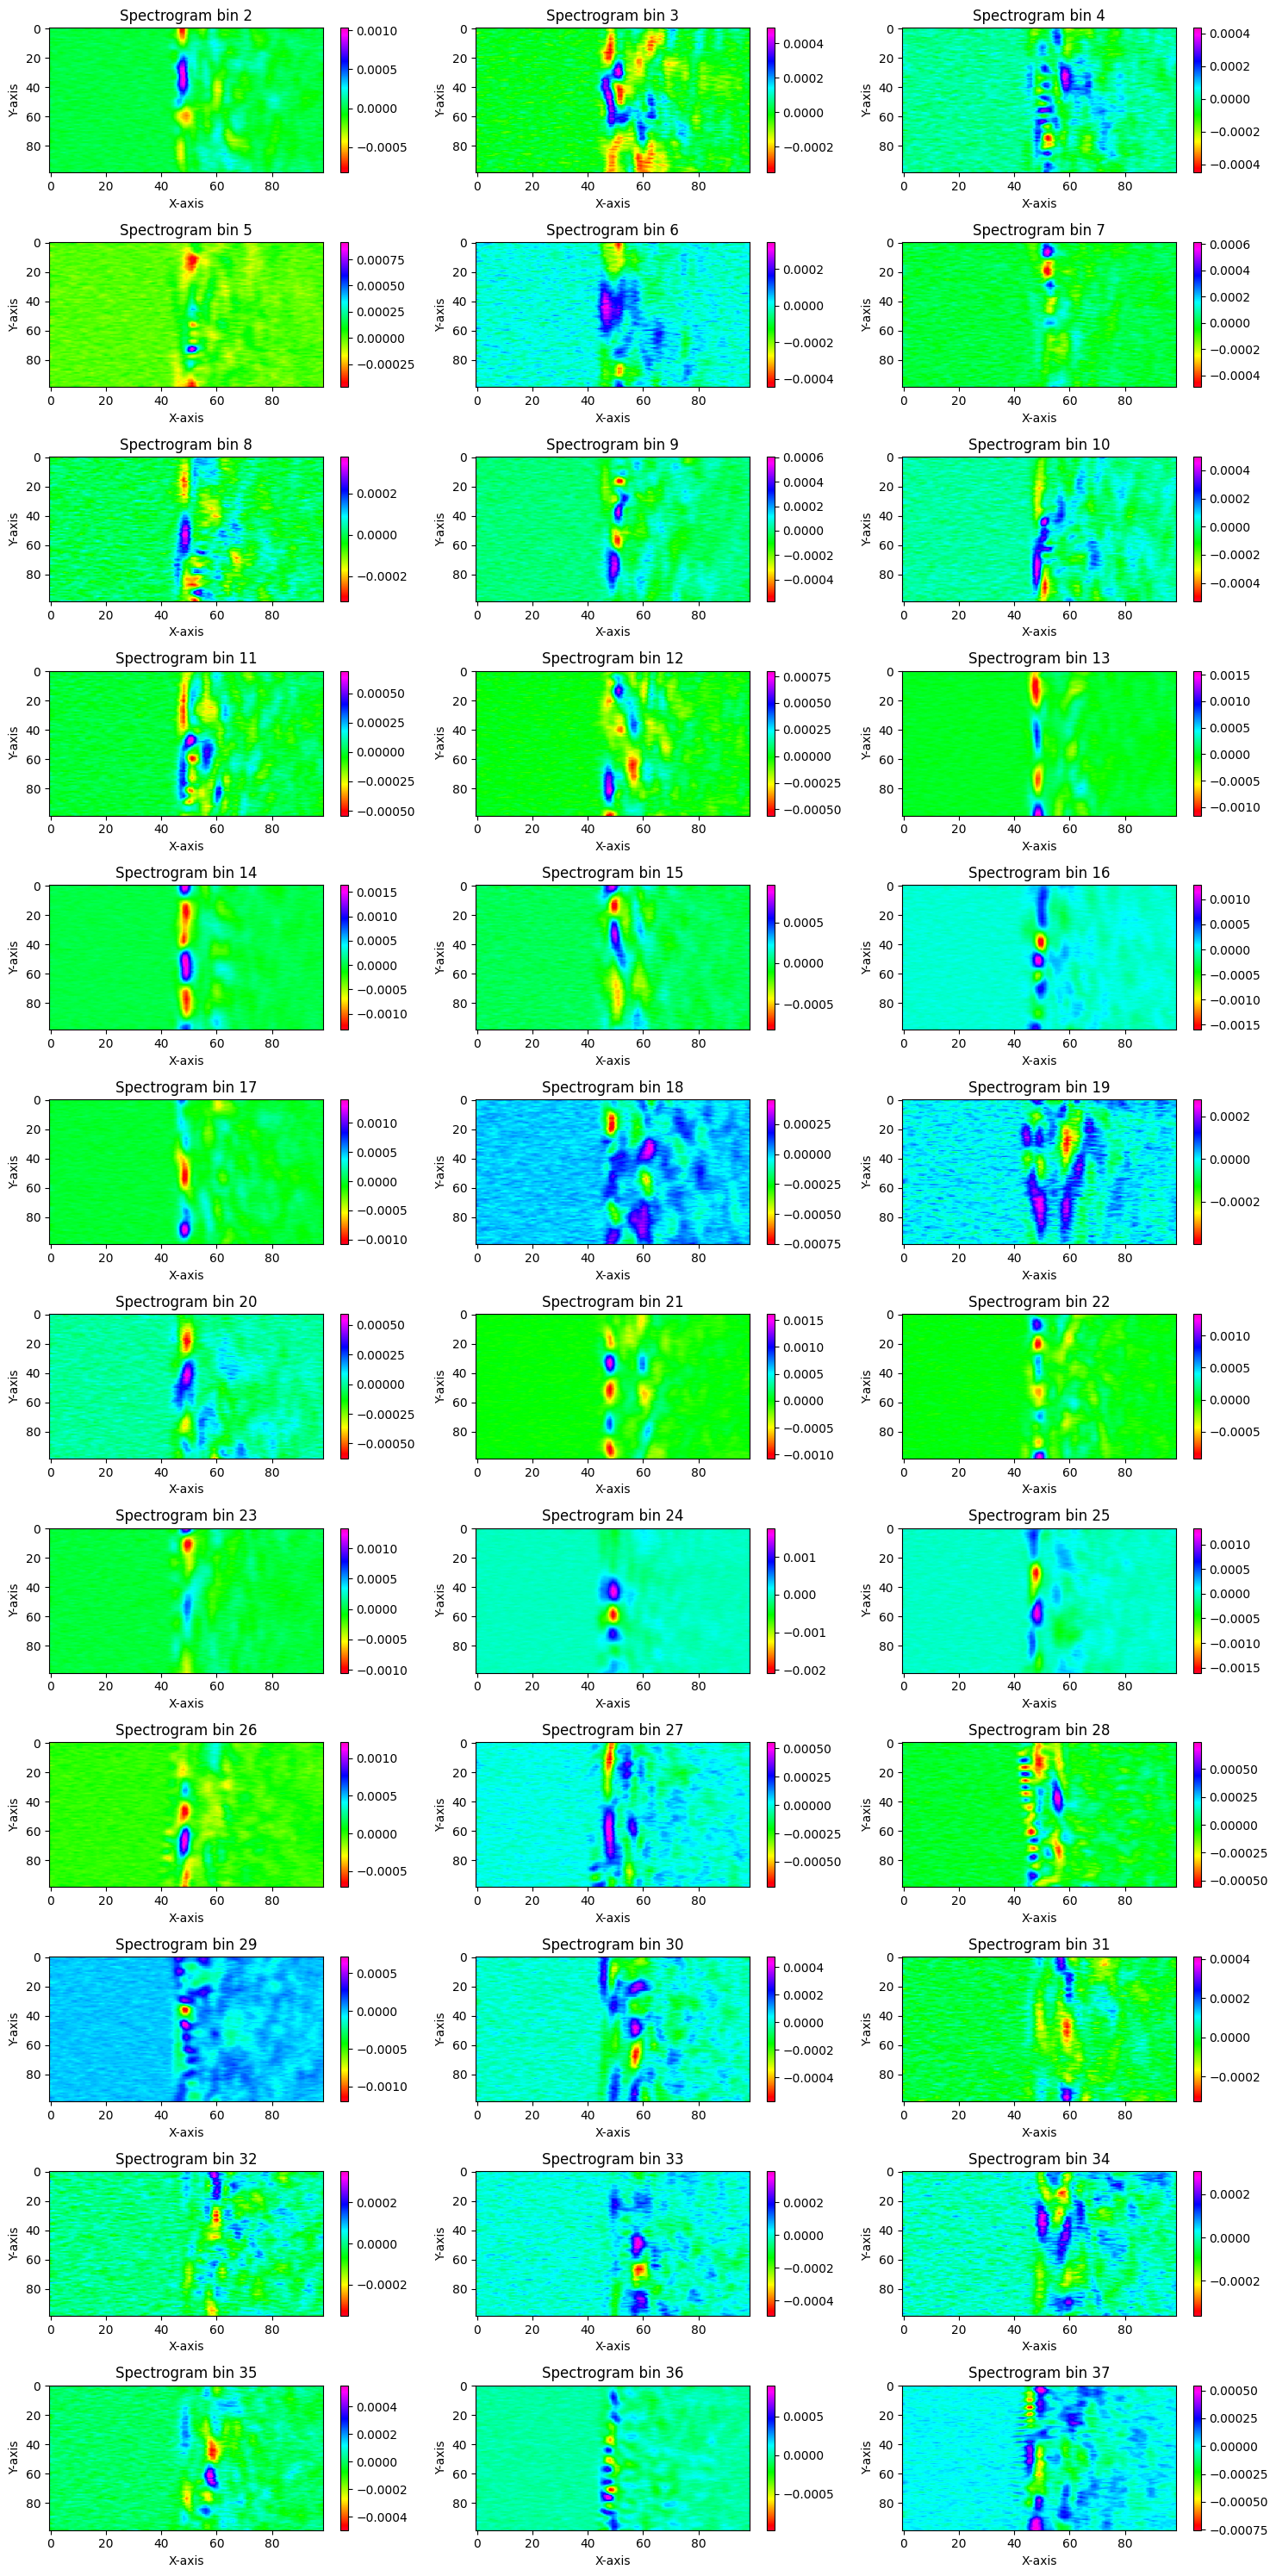

In [58]:
matrix = complex_data[dataset_id]
for column in range(0, matrix.shape[1]):
    matrix[:, column] = signal.sosfilt(hpf,  matrix[:, column])

t_s = 3000
t_f = 6500
t_range = np.arange(t_s, t_f, 99)
bins = np.arange(1, 110, 1)

# Set up the number of rows and columns for the subplots
nrows, ncols = 12, 3

# Calculate the total number of subplots needed
total_plots = np.arange(0, nrows * ncols, 1)

# Create a figure and axis objects
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Loop through each subplot and display the image
for time, bin_id, i in zip(t_range, bins, total_plots):
    # Calculate the row and column index
    row = i // ncols
    col = i % ncols
    
    # Select the axis for the current subplot
    ax = axes[row, col]
    
    # Display the image using imshow
    img = ax.imshow(matrix[3000+time-99:3000+time, 10:109], cmap='gist_rainbow', aspect='auto')
    
    # Add a title to the subplot
    ax.set_title(f'Spectrogram bin {bin_id + 1}')
    
    # Add a color bar to the subplot
    cbar = fig.colorbar(img, ax=ax)
    
    # Optionally, set the axis labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()